### Виды РЛС сигналов


К видам излучения относятся: `вторичное излучение`, `переизлучение`
и `собственное излучение` радиоволн. В первом и втором случаях радиолокатор
излучает в направлении на цель мощный зондирующий сигнал; в последнем
случае облучение цели не требуется.

*Радиолокация с использованием вторичного излучения и переизлучения
(ретрансляции) называется активной, а радиолокация с использованием собственного излучения – пассивной.*

Активную радиолокацию с переизлучением называют радиолокацией с
активным ответом (рис. 1.1, б). При использовании вторичного излучения
можно по аналогии говорить о радиолокации с пассивным ответом (рис. 1.1,
а)

Явление вторичного излучения позволяет обнаружить цели, не
являющиеся источниками собственных радиоизлучений или
переизлучений. Принимаемый сигнал при этом называют `отраженным`.

<center><img src="./images/rls1.png"/></center>

Системы активной радиолокации могут быть `совмещенными` и `разнесенными`.В
совмещенном радиолокаторе передающее и приемное устройства
располагаются совместно (рис. 1.1), возможно поочередное использование
одной и той же антенны для передачи и приема.

В `разнесенной` системе передающее и приемное устройства располагают на
удалении d друг от друга (рис. 1.2). Для наземной разнесенной системы
(рис. 1.2, а) характерно постоянство расстояния d между приемными и передающими пунктами. При расположении передающего пункта на Земле, а приемного на самонаводящейся ракете (рис. 1.2, б) расстояние d является переменным.

<center><img src="./images/rls2.png"/></center>

<center><img src="./images/rls3.png"/></center>

### Временная и частотная области
Временная и частотная области - это два подхода к представлению сигнала

Горизонтальная ось соответствует времени, вертикальная ось – амплитуде.

<center><img src="./images/rls4.png"/></center>

Тот же звуковой сигнал можно представить разложенным по составляющим его частотам. Горизонтальная ось на рисунке ниже представляет частоту, вертикальная ось – мощность.

<center><img src="./images/rls5.png"/></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Здесь я создаю функцию, которая бы генерировала колебания с опеределенной частотой на протяжении определенного времени

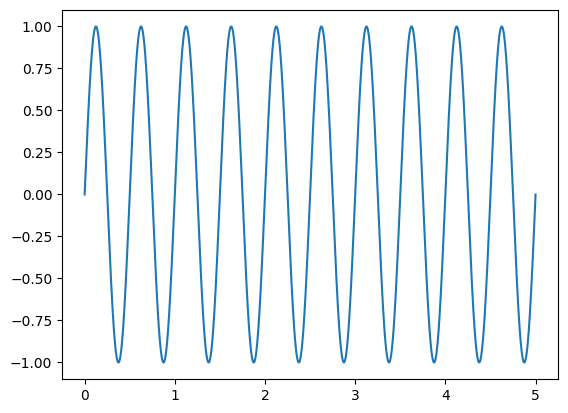

In [2]:
SAMPLE_RATE = 44100  # Гц
DURATION = 5  # Секунды

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x * freq
    # 2pi для преобразования в радианы
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Генерируем волну с частотой 2 Гц, которая длится 5 секунд
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

Теперь можно добавить немного шума

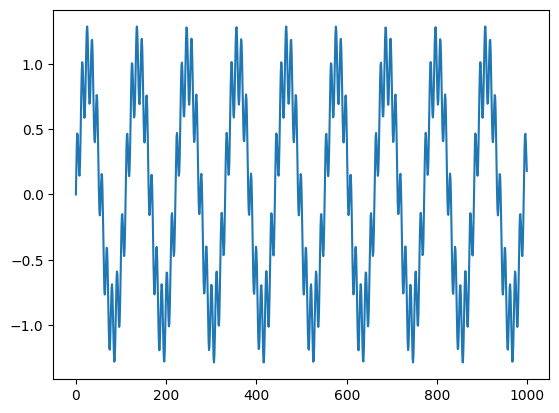

In [3]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)

noise_tone = noise_tone * 0.3
mixed_tone = nice_tone + noise_tone

plt.plot(mixed_tone[:1000])
plt.show()

Встроенная в библиотеку scipy функция fft (Fast Fourier transform) позволяет разложить полученный mixed_sygnal по частотам, что мы и видим на графике. Два пика приходятся на 400 и 4000 - исходные значения синусоиды и шума соответственно


<center><img src="./images/fourier.gif"/></center>

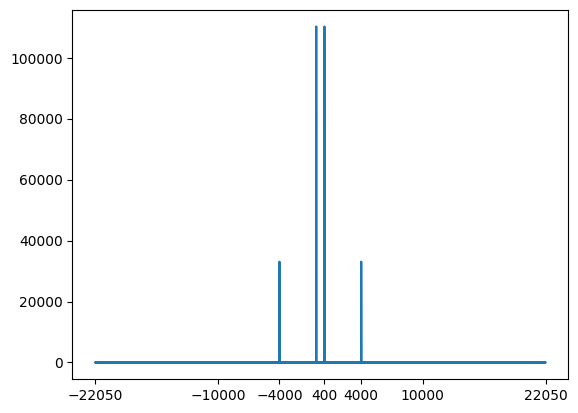

In [4]:
from scipy.fft import fft, fftfreq

# число точек в mixed_tone
N = SAMPLE_RATE * DURATION

yf = np.abs(fft(mixed_tone)) # возвращает мощность для наших частот
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

### Использованные ресурсы:

1) https://github.com/usnistgov/SimulatedRadarWaveformGenerator  - проект по генерации сигналов рлс
2) https://bstudy.net/835010/tehnika/klassifikatsiya_radiolokatsionnyh_signalov
3) https://vii.sfu-kras.ru/images/libs/Radiolokacionnye_sistemy_SFU_elektronnyy_resurs.pdf - учебник по радиолокации
4) https://ru.wikipedia.org/wiki/Временная_область - статья по временной области
5) https://ru.wikipedia.org/wiki/Дискретное_преобразование_Фурье - статья по преобразовании Фурье
6) https://proglib.io/p/preobrazovaniya-fure-dlya-obrabotki-signalov-s-pomoshchyu-python-2020-11-03 - примеры кода, основная информация 